In [53]:
import numpy as np
import matplotlib.pyplot as plt

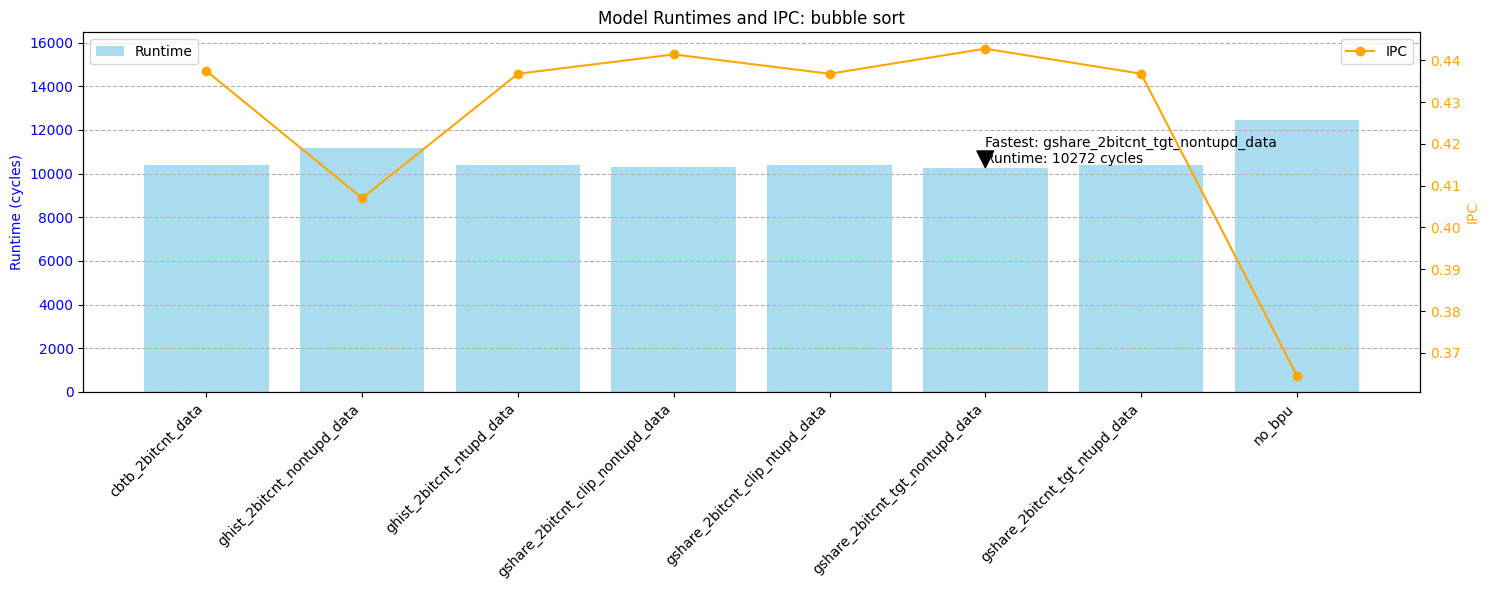

Differences from the fastest runtime:
cbtb_2bitcnt_data: 125 cycles
ghist_2bitcnt_nontupd_data: 902 cycles
ghist_2bitcnt_ntupd_data: 141 cycles
gshare_2bitcnt_clip_nontupd_data: 32 cycles
gshare_2bitcnt_clip_ntupd_data: 141 cycles
gshare_2bitcnt_tgt_nontupd_data: 0 cycles
gshare_2bitcnt_tgt_ntupd_data: 141 cycles
no_bpu: 2202 cycles


In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Data: model names, runtimes, and IPC
models = [
    "cbtb_2bitcnt_data",
    "ghist_2bitcnt_nontupd_data",
    "ghist_2bitcnt_ntupd_data",
    "gshare_2bitcnt_clip_nontupd_data",
    "gshare_2bitcnt_clip_ntupd_data",
    "gshare_2bitcnt_tgt_nontupd_data",
    "gshare_2bitcnt_tgt_ntupd_data",
    "no_bpu"
]

runtimes = [10397, 11174, 10413, 10304, 10413, 10272, 10413, 12474]
ipc = [0.43743388, 0.40701629, 0.43676174, 0.44138199, 0.43676174, 0.44275701, 0.43676174, 0.36459836]

# Convert runtimes to numpy array for easier manipulation
runtimes = np.array(runtimes)

# Find the fastest model
fastest_index = np.argmin(runtimes)
fastest_runtime = runtimes[fastest_index]
fastest_model = models[fastest_index]

# Calculate differences from the fastest runtime
differences = runtimes - fastest_runtime

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to increase spacing

# Bar plot for runtimes
ax1.bar(models, runtimes, color='skyblue', label='Runtime', alpha=0.7)
ax1.set_ylabel('Runtime (cycles)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Model Runtimes and IPC: bubble sort')

# Set y-axis limits
ax1.set_ylim(0, max(runtimes) + 4000)  # Adjust the upper limit as needed

# Adding annotations for the fastest model
ax1.annotate(f'Fastest: {fastest_model}\nRuntime: {fastest_runtime} cycles',
             xy=(fastest_index, fastest_runtime), 
             xytext=(fastest_index, fastest_runtime + 200),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Create a second y-axis for IPC
ax2 = ax1.twinx()
ax2.plot(models, ipc, color='orange', marker='o', label='IPC')
ax2.set_ylabel('IPC', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# Adding grid and legend
ax1.grid(axis='y', linestyle='--')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

# Print differences
print("Differences from the fastest runtime:")
for model, diff in zip(models, differences):
    print(f"{model}: {diff} cycles")
